In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential
import matplotlib.pyplot as plt
import cv2

from keras.layers import Input, UpSampling2D
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [2]:
from PIL import Image

In [3]:
def load_image(image_path):
    '''Load function'''
    img = cv2.imread(image_path)
    img= cv2.resize(img, (512, 256), interpolation = cv2.INTER_AREA)[...,::-1]
    return img

In [4]:
def show_image(image, title=None):
    plt.axis('off')
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.show()

In [5]:
in_google_colab = False # Whether this notebook is run on Google Colab or not

def upload_colab():
    '''Uploads the needed ouputs if we are working in Google Colab.
    And returns the list of input/output images'''
    
    from google.colab import files 

    images_input = []
    images_output = []

    uploaded_in = files.upload()

    for image in uploaded_in.keys():
        # Imports input images

        table = load_image(image)
        images_input.append(table.tolist())

    uploaded_out = files.upload()

    for image in uploaded_out.keys():
        # Imports output (stylized) images
        
        table_2 = load_image(image)
        images_output.append(table_2.tolist())
        
    return images_output, images_input

In [6]:
import os

def computer_upload():
    '''Returns input/output images list if working on a computer with the right files'''

    images_input = []
    images_output = []

    
    for i in os.listdir('Project/images_input'):
        if 'rslt' not in i and '.config' not in i and '.ipynb' not in i and 'sample_data' not in i:
            image = i
            table = load_image('Project/images_input/'+image)
            images_input.append(table.tolist())

            image_2 = 'Project/images_candy/' + i[:10] + 'img_rslt.png'
            table_2 = load_image(image_2)
            images_output.append(table_2.tolist())
            
    return images_input, images_output
    

In [7]:
# Creation of the data lists

if in_google_colab:
    images_input, images_output = upload_colab()
else:
    images_input, images_output = computer_upload()

In [8]:
# Checking the length of the lists

print(len(images_output[0]))
print(len(images_output[0][0]))
print(len(images_input))
print(len(images_output))

256
512
60
60


In [9]:
def preprocess(x):
    # Switching to np arrays
    z = np.array(x)
    # Normalization and reshape
    z =z.reshape(len(x), 256, 512, 3) / 255
    return z
    

In [10]:
X_train_d = preprocess(images_input)
Y_train_d = preprocess(images_output)

print(X_train_d.shape)

# # Normalization and reshape
# X_train_d = X_train_d.reshape(len(images_input), 256, 512, 3) / 255
# Y_train_d = Y_train_d.reshape(len(images_output), 256, 512, 3) / 255

(60, 256, 512, 3)


In [11]:
# Creation of the model : an autoencoder with convolution layers
# The commented lines are used to test different types of architectures

model = Sequential()
model.add(Conv2D(32*3, (2, 2), activation='relu', input_shape=(256, 512, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
# model.add(Conv2D(512, (5, 5), activation='relu', padding='same'))
# model.add(MaxPooling2D((2, 2), padding='same'))

# model.add(Conv2D(512, (5, 5), activation='relu', padding='same'))
model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
model.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
# model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32*3, (5, 5), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (5, 5), activation='relu', padding='same'))

print(model.summary())

model.compile(optimizer='adadelta', loss='binary_crossentropy')
# model.compile(optimizer='adagrad', loss='mse')


model.fit(X_train_d, Y_train_d, epochs=10, batch_size=1) # launches training

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 255, 511, 96)      1248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 256, 96)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 256, 128)     307328    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 256, 256)     819456    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 256, 256)     1638656   
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 256, 128)     819328    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 128, 256, 96)      307296    
__________

In [12]:
# Testing the model

test_image = load_image('Project/images_test/test.jpg')
x_test = preprocess([test_image])

y_test = model.predict(x_test)

y_train = model.predict(X_train_d[0].reshape(1, 256, 512, 3))

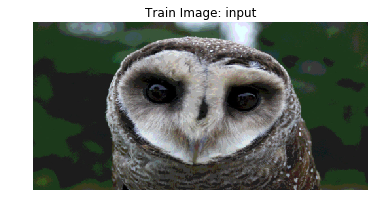

In [13]:
show_image(X_train_d[0], 'Train Image: input')

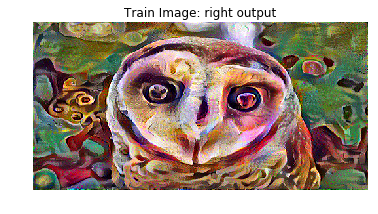

In [14]:
show_image(Y_train_d[0], 'Train Image: right output')

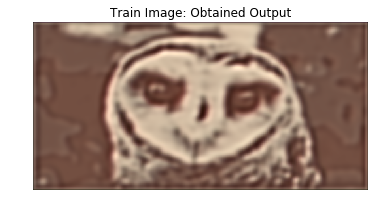

In [15]:
show_image(np.clip(y_train[0], 0, 1), 'Train Image: Obtained Output')

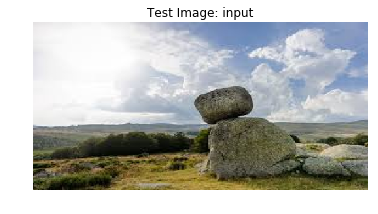

In [16]:
show_image(x_test[0], 'Test Image: input')

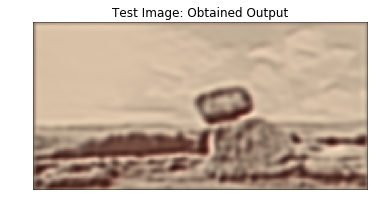

In [17]:
show_image(np.clip(y_test[0], 0, 1), 'Test Image: Obtained Output')